In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import fitsio as ft
import pandas as pd
from utils import hpix2radec
from nnbar import NNBAR

camb is not installed!


In [2]:
df = pd.read_hdf('/Volumes/TimeMachine/data/DR7/DR7meta.h5')
depth_g = df['depth_g_total'].values

galmap = hp.read_map('/Volumes/TimeMachine/data/DR7/eBOSS.ELG.NGC.DR7.cut.hp256.fits', verbose=False)
fracmap = hp.read_map('/Volumes/TimeMachine/data/DR7/frac.hp.256.fits', verbose=False)
mask = hp.read_map('/Volumes/TimeMachine/data/DR7/mask_data_mock.cut.hp.256.fits', verbose=False) > 0
wnn = hp.read_map('/Volumes/TimeMachine/data/DR7/results/regression/nn_p/nn-weights.hp256.fits', verbose=False)
wnn2 = hp.read_map('/Volumes/TimeMachine/data/DR7/results_referee/nn_p/nn-weights.hp256.fits', verbose=False)

In [3]:
chi2 = lambda y, ye:(((y-1)/ye)**2).sum()

def run(maski, wnni=None):    
    
    # get mean density
    ndepth = NNBAR(galmap, fracmap, maski, depth_g, selection=wnni)
    ndepth.run()

    
    y = ndepth.output['nnbar']
    x = (ndepth.output['bin_edges'][:-1])#+ndepth.output['bin_edges'][1:])
    ye = ndepth.output['nnbar_err']

    nan = np.isnan(y) | np.isnan(ye)
    if nan.sum()!=0:
        print(y, nan.sum())
        y = y[~nan]
        x = x[~nan]
        ye = ye[~nan]


    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.errorbar(x, y, yerr=ye, marker='o', color='b', ls='none')
    for xmin in x[:-3]:
        chi2v = chi2(y[x>xmin], ye[x>xmin])
        print(xmin, chi2v)
        ax2.scatter(xmin, chi2v, 
                    color='darkorange', marker='s', facecolors='none')

    ax1.set_ylim(0.8, 1.2)
    ax1.axhline(1, ls=':', color='blue')
    #ax2.axhline(50, ls='--', color='orange')
    #ax2.text(24.6, 52, '95% Null mocks', color='orange')

    ax1.set_xlabel('Depth_g')
    ax1.set_ylabel('N/Nbar', color='b')
    ax2.set_ylim(-5, 85)
    ax2.set_ylabel('Chi2(>depth_g)', color='darkorange', fontweight='bold')

min sys : 22.80  max sys : 44.58
num of pts : 86812, num of bins : 20
22.80359649658203 1562.0239309361443
23.856889724731445 1032.2874661692624
23.98033905029297 663.32699460469
24.052764892578125 533.8145538767358
24.106904983520508 515.7565844558397
24.149980545043945 501.6117477048125
24.185871124267578 501.50556466354493
24.21746253967285 501.23552712509627
24.244470596313477 497.55083225862865
24.269676208496094 465.2092155636418
24.292816162109375 446.7810594494401
24.314373016357422 390.7241558612452
24.336261749267578 346.62198744864963
24.35948944091797 301.84191025121595
24.38421058654785 263.9325610766795
24.41143035888672 206.17716895969423
24.44207000732422 127.73307837983808


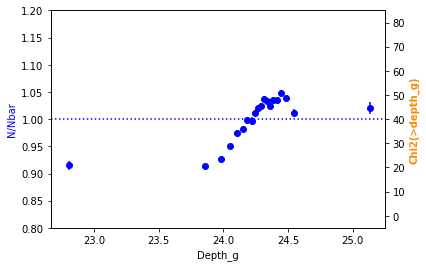

In [4]:
run(mask, None)

min sys : 22.80  max sys : 44.58
num of pts : 86812, num of bins : 20
22.80359649658203 78.10882713761666
23.856889724731445 65.09982375675587
23.98033905029297 30.049712554535464
24.052764892578125 23.172607466583983
24.106904983520508 23.102873775380736
24.149980545043945 22.680709936928334
24.185871124267578 22.482542293890237
24.21746253967285 21.529227396632354
24.244470596313477 21.446327782654798
24.269676208496094 19.071816326845653
24.292816162109375 18.470466065550564
24.314373016357422 8.405102265811864
24.336261749267578 6.5500727267882075
24.35948944091797 4.760687949985108
24.38421058654785 4.34237135822487
24.41143035888672 4.222266712225517
24.44207000732422 0.5733330626665981


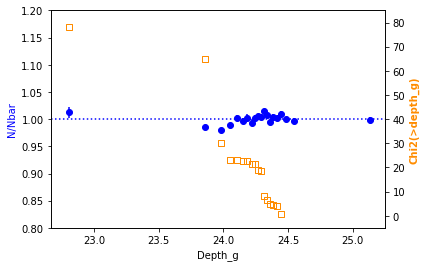

In [5]:
run(mask, wnn)

min sys : 22.80  max sys : 44.58
num of pts : 86812, num of bins : 20
22.80359649658203 84.5450694803159
23.856889724731445 71.68373438857691
23.98033905029297 34.21108224642931
24.052764892578125 27.592924453879412
24.106904983520508 27.534085398840965
24.149980545043945 26.41579095938121
24.185871124267578 26.396764506704887
24.21746253967285 24.4684458848189
24.244470596313477 24.45274131706622
24.269676208496094 22.179312283662906
24.292816162109375 20.885579011812133
24.314373016357422 11.684948581194327
24.336261749267578 8.890605740095513
24.35948944091797 8.619286261865328
24.38421058654785 7.292791842182958
24.41143035888672 6.594965386189855
24.44207000732422 1.3163299775971038


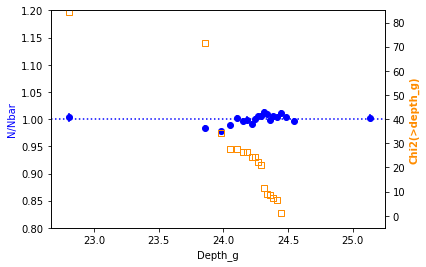

In [6]:
run(mask, wnn2)

min sys : 23.95  max sys : 44.58
num of pts : 78982, num of bins : 20
23.95000648498535 37.3714996075139
24.027101516723633 28.74317826741012
24.082332611083984 25.060979076960756
24.1268310546875 21.913893153189683
24.163528442382812 20.317554103758155
24.194753646850586 20.193808554708777
24.222576141357422 18.69130137849407
24.24679183959961 18.333987464193203
24.269962310791016 17.294223172250167
24.29116439819336 17.034106413360142
24.31105613708496 11.000091991240323
24.33109474182129 5.420584223040417
24.351835250854492 4.735228514925986
24.373706817626953 3.627874408130018
24.397418975830078 3.206786761015672
24.424053192138672 2.545820622026614
24.454486846923828 0.8147727138333841


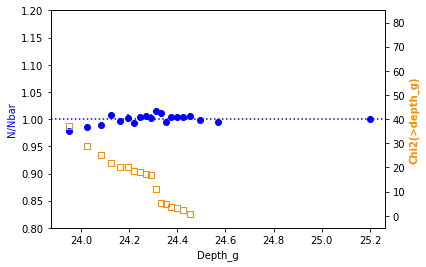

In [26]:
run(mask & (depth_g >= 23.95), wnn)

In [30]:
1- (depth_g[mask] >= 23.95).mean()

0.09019490393033225

In [28]:
(depth_g[mask] < 23.9).mean()

0.06855043081601622

In [14]:
ra, dec = hpix2radec(256, np.argwhere(mask).flatten())

In [10]:
depth_g[mask].max()

44.576934814453125

Text(0.5, 0, 'depth g')

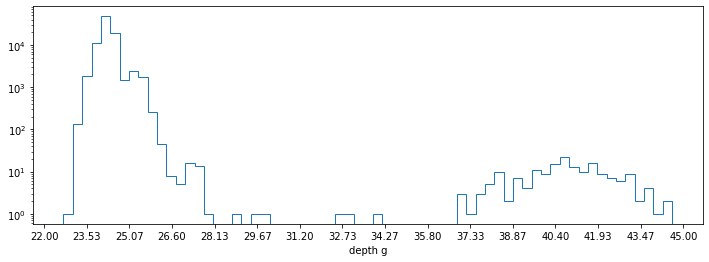

In [25]:
plt.figure(figsize=(12, 4))
plt.hist(depth_g[mask], 
         bins=65, range=(22.7, 44.6),
         histtype='step')
plt.yscale('log')
plt.xticks(np.linspace(22, 45, 16))
plt.xlabel('depth g')

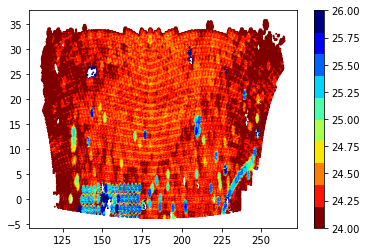

In [17]:
cmap = plt.cm.get_cmap('jet_r', 10)
plt.scatter(ra, dec, 1, c=depth_g[mask], marker='H',  
            cmap=cmap, vmin=24, vmax=26)
plt.colorbar()